    This is a customizable script that allow you to run simulations of the synaptic transimmsion in hippocampal CA3-CA1
    synapse. 
    
    
    The proposed protocol is composed of 4 different steps, that must be run sequentially:
    
    1. Design of the stimulation protocol
    2. Gating kinetic simulation of AMPARs and NMDARs
    3. Calculation of the evoked synaptic currents and depolarization's potentials
    4. Kinetic simulation of the autophosphorilation of post-synaptic CaMKII enzyme
    
    

In [7]:
%matplotlib notebook

from Modules import *
from utility import *
import numpy as np


PARAMETERS = {}


In [8]:
''' 
    1.
    
    PARAMETRIZATION 
    
    In this section you can set the foundamental parameters for run your simulation.
    The model allows you to simulate both PRE-SYNAPTIC and POST-SYNAPTIC stimuli.
    Both pre-synaptic and post-synaptic action potentials can be modelled independently 
    as two-frequencies based trains of bursts, allowing the creation of highly customizable stimulation patterns. 
    In this design paradigm, the first frequency sets the intraburst frequency, while the second one describes 
    the interburst frequency.
    
    Pre-synaptic action potentials are directly modelled as free glutamate pulses which is pumped into the system.
    Both the amplitude (i.e. the amount of the glutamate that will be released) and the width (i.e. the time duration each 
    glutamate load inside the synaptic clef) of the glutamate pulses can be set in this section.
    
    Post-synaptic stimulation consits in a sequence of back-propagating actions potentials, which are modelled in the 
    post-synaptic neuron as transient depolarization potentials and shaped by a double exponential function.
    
    
'''


PARAMETERS = {
    
                # GENERAL parametrs #
    
                'T_total': 0.5 ,         # Set the total simulation time (s). -----> N.B.: it MUST BE > 0
                'dt' : 1E-6,           # Set integation time step (s).      -----> N.B.: it MUST BE > 0 
                
                'Vr': -67,             # Set the resting membrane potential of the post-synaptic spine (mV).
                'Mg' : 1,              # Set the extracellular Mg2+ concentration (uM).
    
                # STIMULATION PATTERN DESIGN parameters #
                
                'Glu' : 1000,          # Set the AMPLITUDE of each glutamate pulse (uM).
                'Glu_time' : 1E-3,     # Set the TIME DURATION of each glutamate pulse (s).
    
                'T_PRE' :  1*1E-6,     # Set the TIME at which pre-synaptic stimulation starts. -> N.B.: it MUST BE != 0
                'f1_PRE' : 100,        # Set the INTRA-BURST frequency of the pre-synaptic stimulation pattern (Hz).
                'n1_PRE' : 5,          # Set the NUMBER of stimuli that compose each pre-synaptic burst.
                'f2_PRE' : 5,          # Set the INTER-BURST frequency of the pre-synaptic stimulation pattern (Hz)
                                       #  -> N.B.: it MUST BE >= f1_PRE
    
                'T_POST' : 20 *1E-3,   # Set the TIME at which post-synaptic stimulation starts. -> N.B.: it MUST BE != 0
                'f1_POST' : 1,         # Set the INTRA-BURST frequency of the post-synaptic stimulation pattern (Hz).
                'n1_POST' : 1,         # Set the NUMBER of stimuli that compose each post-synaptic burst.
                'f2_POST' : 5,         # Set the INTER-BURST frequency of the post-synaptic stimulation pattern (Hz)
                                       # -> N.B.: it MUST BE >= f1_POST

                # RECEPTORS GATING SIMULATION parameters #
                
                'AMPA_tot' : 20,      # Set the total number of AMPA receptors
                'NMDA_tot' : 15,      # Set the total number of NMDA receptors
    
                'pKd': 5.6,           # Set the pKd for the NMDA-glutamate interaction (uM). Default (WT) value is 5.6 uM
    
                # CaMKII ACTIVATION SIMULATION parameters #
    
                'CaM_init' : 30,       # Set the initial concentration of free CaM species (uM)
                'CaMKII_init' : 80,    # Set the initial concentration of free CaMKII species (uM)
    
               }

<IPython.core.display.Javascript object>


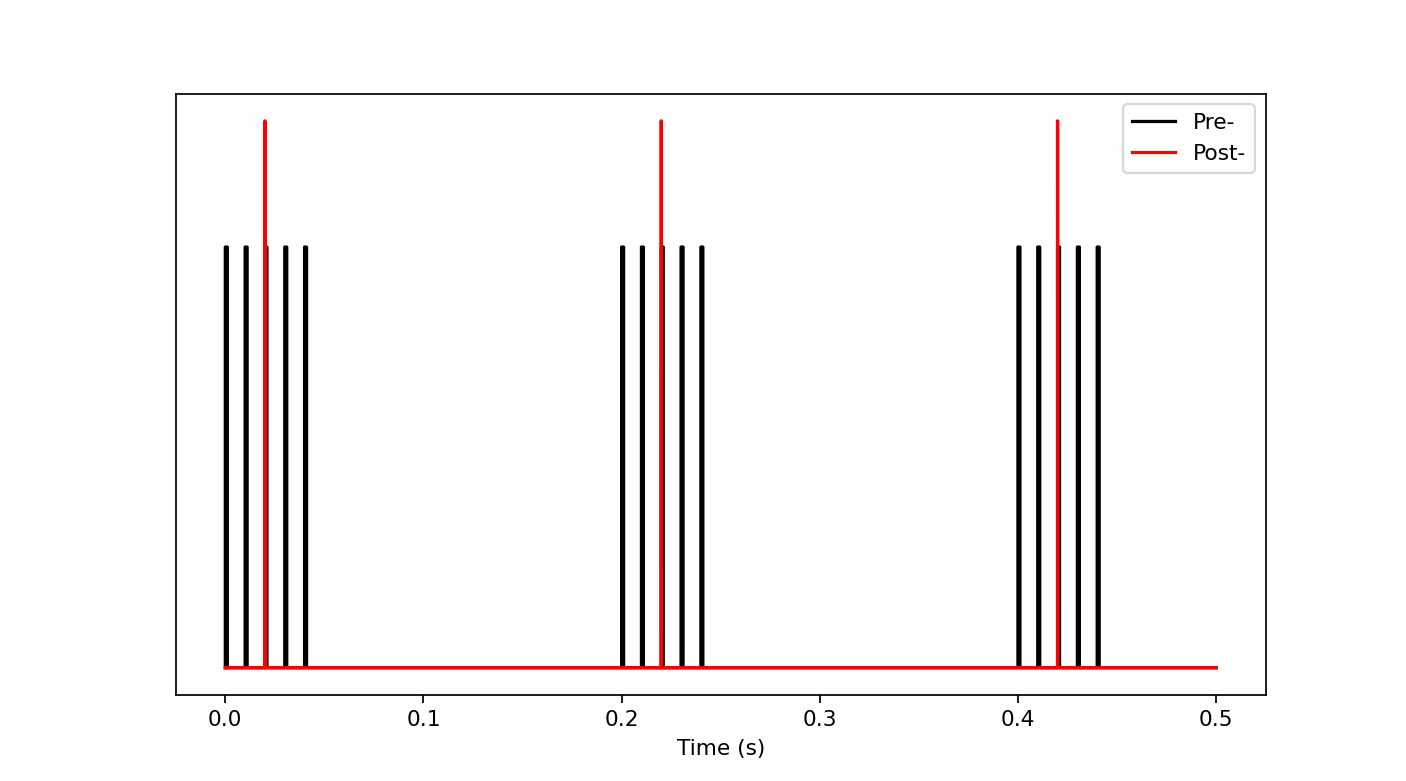

In [9]:
''' Show pre and post-synaptic stimulation pattern. Pre-synaptic events (glutamate pulses) are represented in black, 
    while post-synaptic events (dendritic bAP) are represented in red. '''

pre, post = Stimulation_Pattern_Design(PARAMETERS,plot=True)


Simulating Synaptic Cleft Compartment ... Done!


<IPython.core.display.Javascript object>


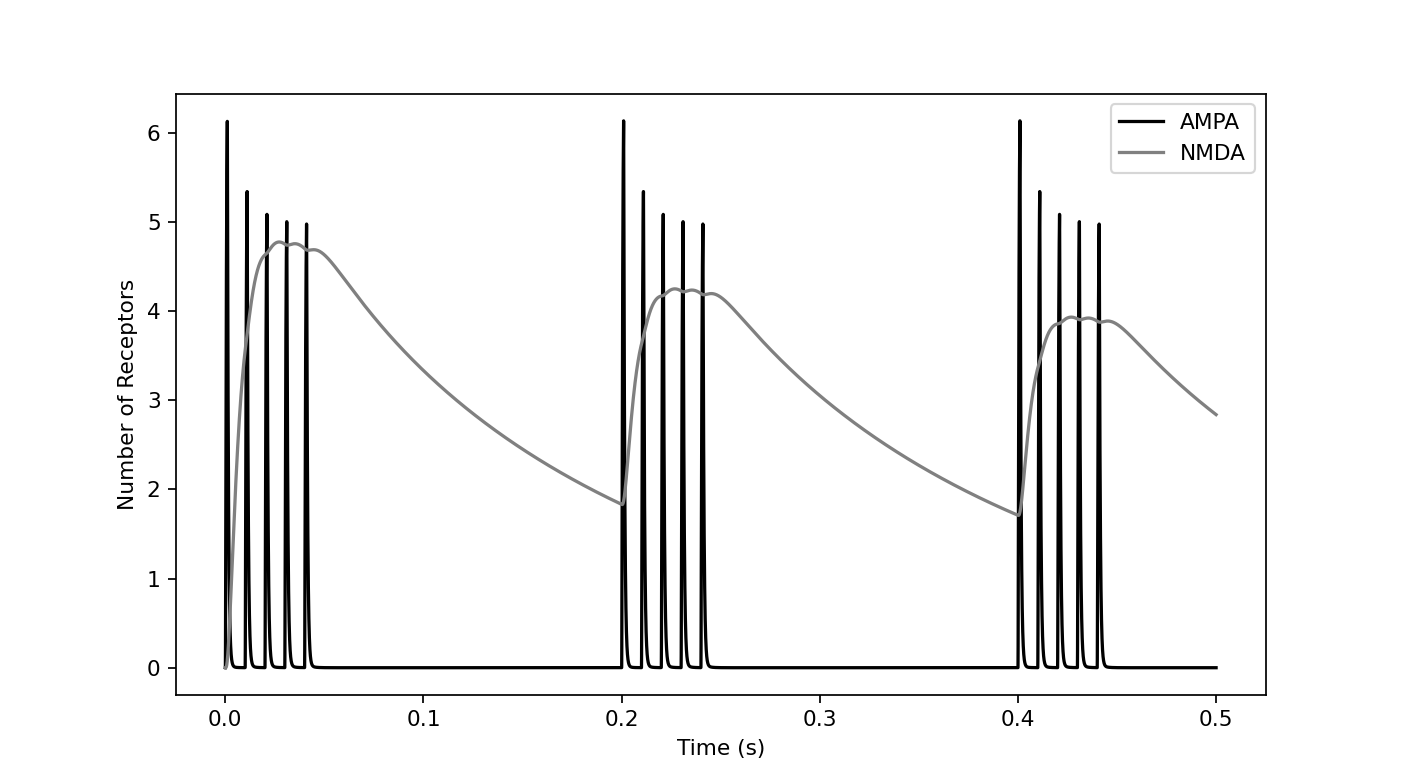

In [10]:
'''
    2.
    
    RECEPTORS GATING SIMULATION
    
    Our model includes the gating simulation of NMDARs and AMPARs present on the membrane of CA1 pyramidal neuron.
    This simulation is based on two different kinetic models (one for each receptor) implemented as systems of differential ù
    equations in a PySB model. These models describe the states transition that the receptors face, from the binding with the 
    neurotransmitter to the actual opening of the channel, passing through pre-opening and desensitization states.
    
    In this section you can simulate the receptors gating kinetic model, which will predict the fractions of the two receptors 
    populations which open over the time, using as input the glutamate pulses (pre-synaptic stimulation) designed in the 
    previous step.
 
'''

results_RGS = Receptors_Gating_Simulation(PARAMETERS,plot=True)


EPSCs/EPSPs Calculation is running ...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Done!


<IPython.core.display.Javascript object>


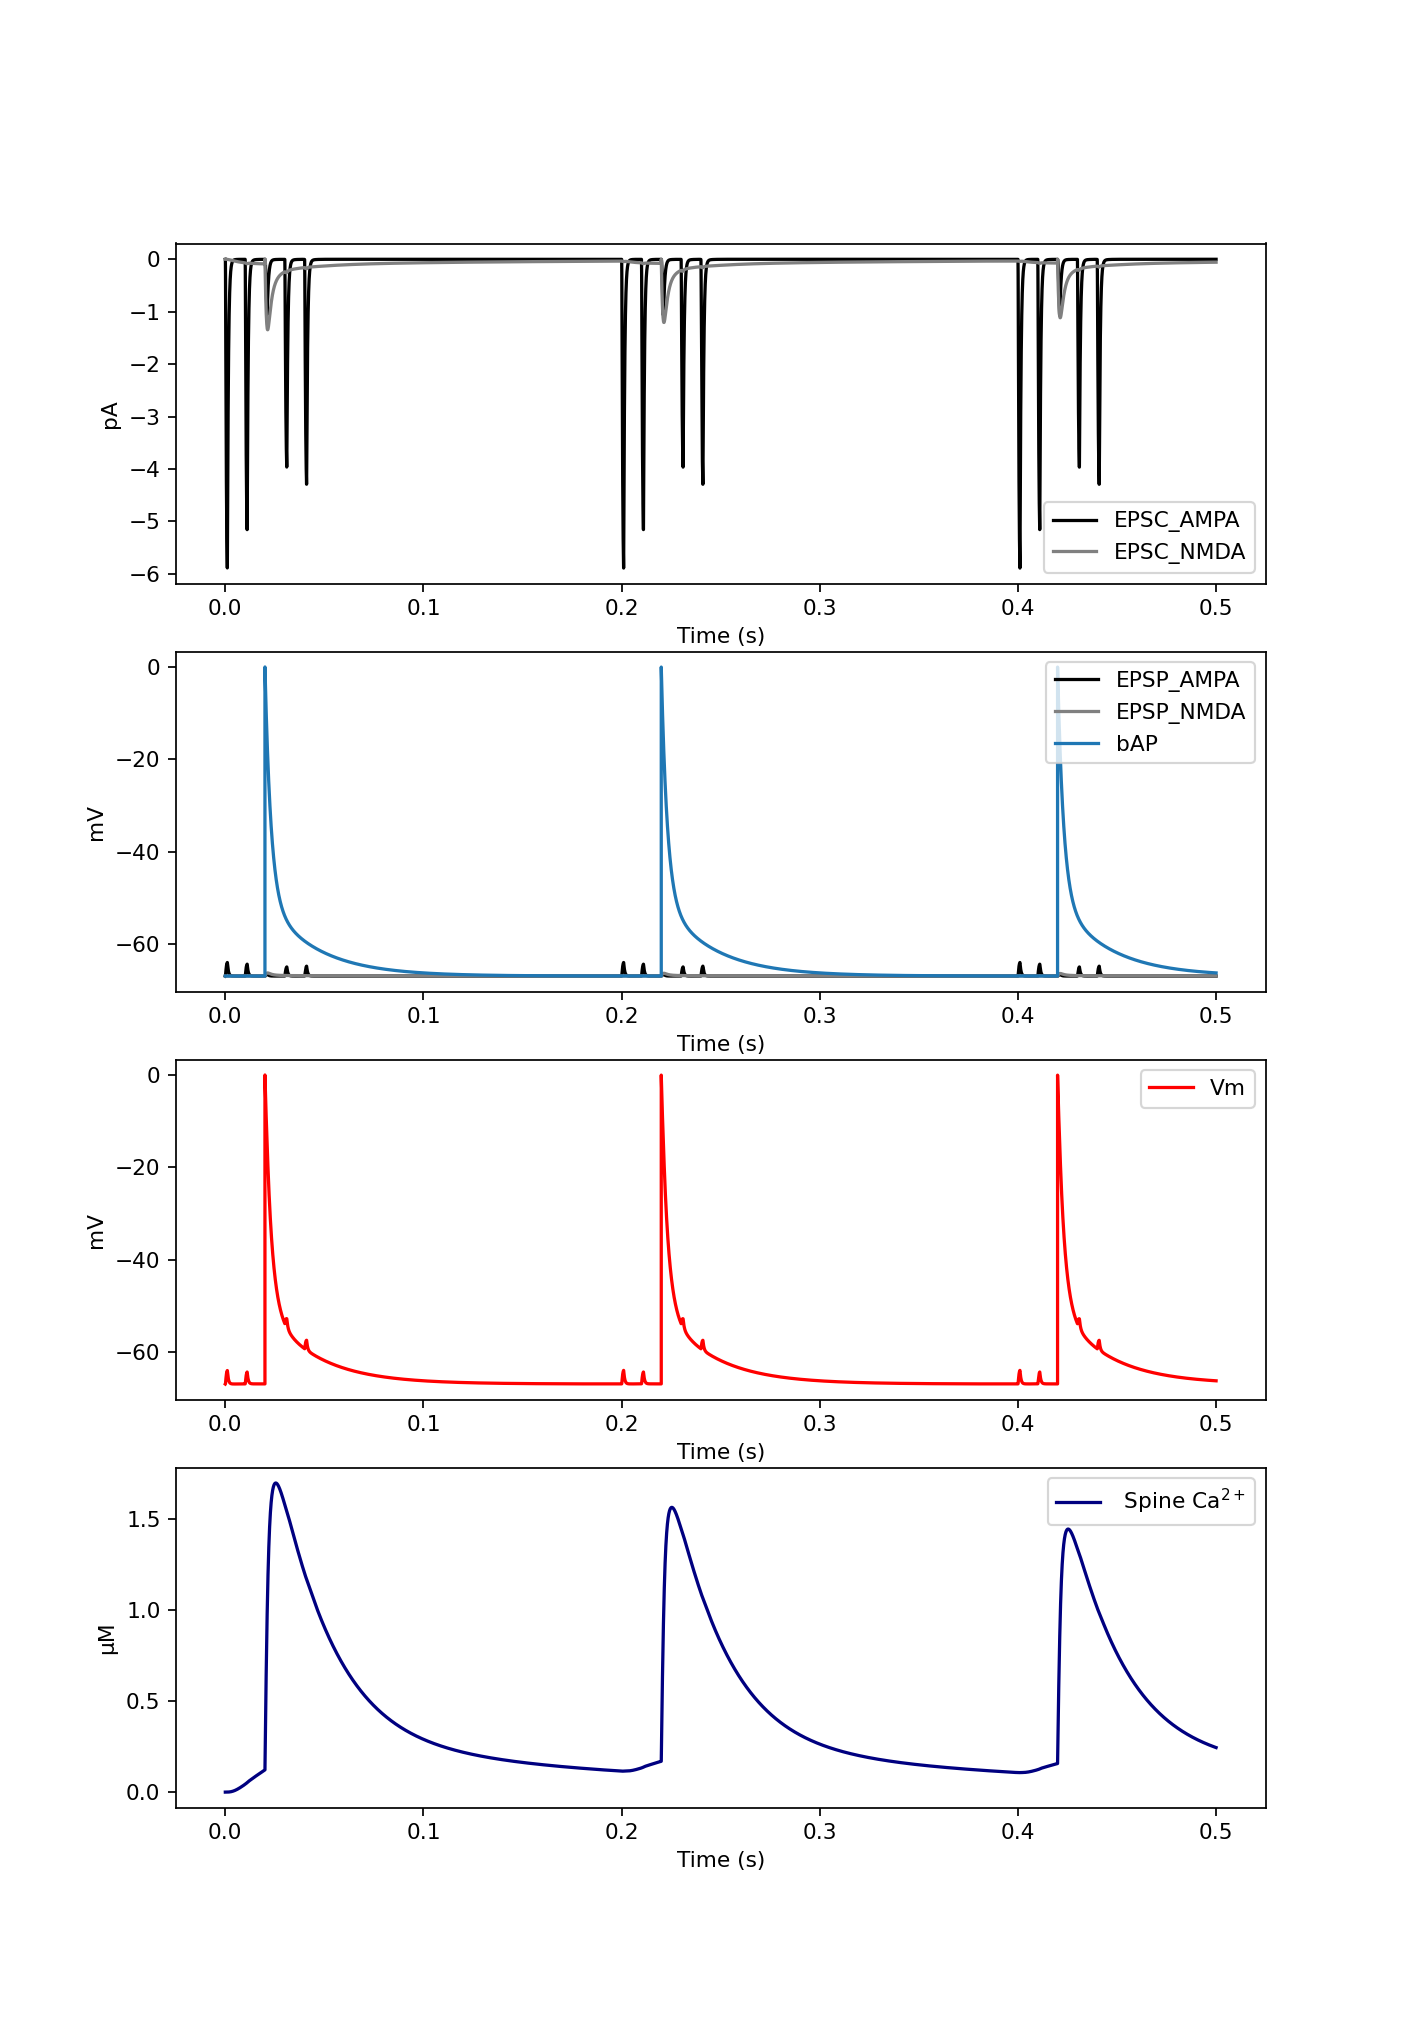

In [12]:
'''
    3.
    
    EPSPs/EPSCs CALCULATION
    
    In this section the trajectories of the open states of both AMPA and NMDA receptors calculated in the second step are 
    used to simulate the respective excitatory post-synaptic currents (EPSCs) and potentials (EPSPs). Since calcium is
    a key mediator in Schaffer collateral synapses, driving different transmission-related phenomena such as synaptic 
    plasticity or post-synaptic cell excitotoxicity, the Ca2+ component of the total NMDARs-mediated current is then calculated.
    
'''

results_CPC = EPSCs_EPSPs_Calculation(PARAMETERS,results_RGS['O_AMPA'],results_RGS['O_NMDA'],plot=True)


Simulating Spine Compartment ...
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Done!


<IPython.core.display.Javascript object>


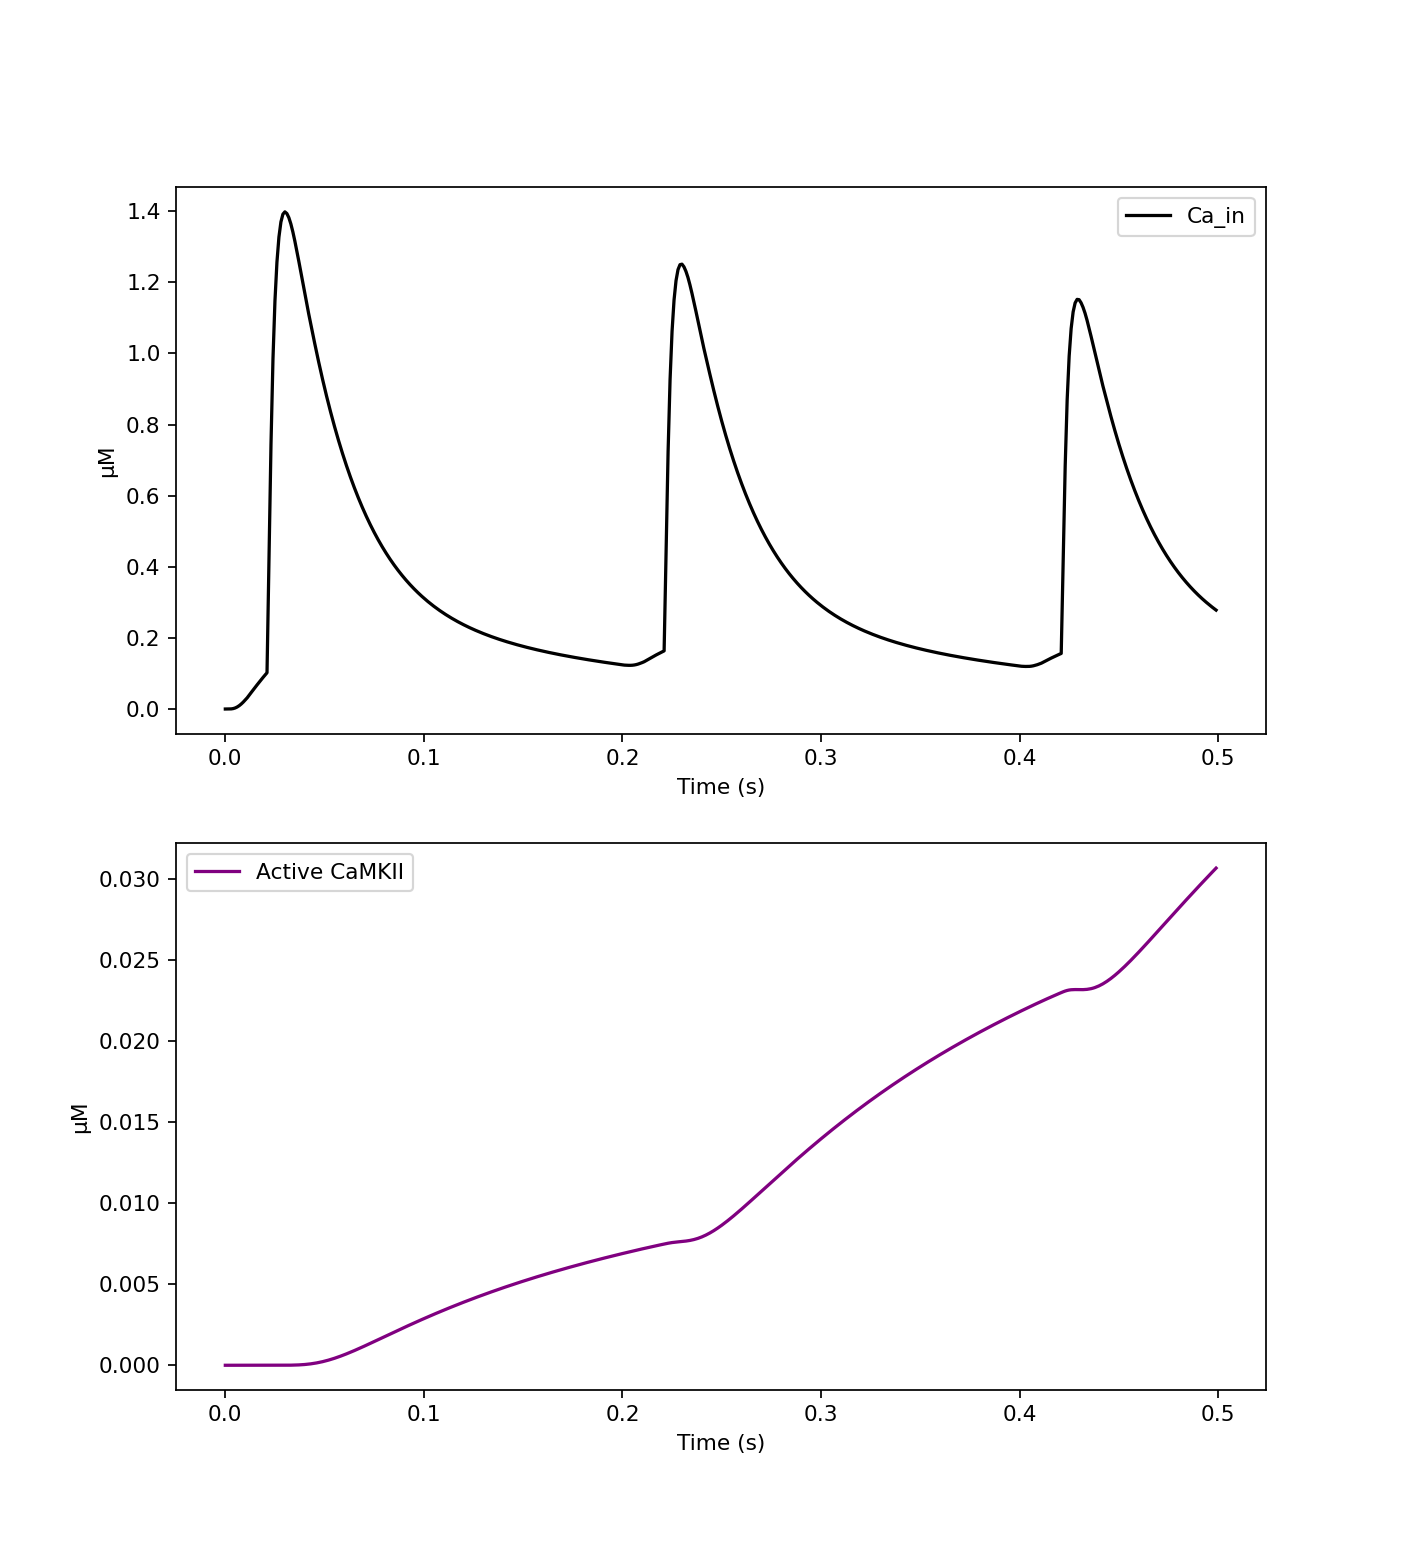

In [13]:
'''
    4.
    
    CaMKII ACTIVATION SIMULATION
    
    In this last section of the framework the inward Ca2+ current previousely calculated is feed into another PySB model
    containg a system of diferential equations describing the reversible Ca2+/CaM, Ca2+/CaMKII, CaM/CaMKII interaction
    and the irreversible CaMKII autophosphorylation reaction.
    
'''

results_CAS = CaMKII_Activation_Simulation(PARAMETERS, results_CPC['Ca_spine'],plot=True)